# Notebook Setup

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/brewing/

/content/drive/MyDrive/brewing


In [ ]:
ls data

Input1_clientes_estructura.csv  Input3_clientes_test.csv  test_features.csv
Input2_clientes_venta.csv       labels.csv                train_features.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [ ]:
from dataset.dataset import DataSet
ds = DataSet()

## Clients

In [ ]:
ds.clients_df.head()

,Cliente,Regional2,Gerencia2,SubCanal2,Categoria,Nevera
0,1,Regional 1,Gerencia_1,Subcanal_1,Categoria_1,0
1,2,Regional 1,Gerencia_1,Subcanal_1,Categoria_1,0
2,3,Regional 1,Gerencia_1,Subcanal_1,Categoria_1,0
3,4,Regional 1,Gerencia_1,Subcanal_1,Categoria_1,1
4,5,Regional 1,Gerencia_1,Subcanal_1,Categoria_2,1


Notes:
* There are not null in the clients_df


In [ ]:
ds.clients_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20921 entries, 0 to 20920
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Cliente    20921 non-null  int64 
 1   Regional2  20921 non-null  object
 2   Gerencia2  20921 non-null  object
 3   SubCanal2  20921 non-null  object
 4   Categoria  20921 non-null  object
 5   Nevera     20921 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 980.8+ KB


Notes:
* There are 20921 Clients, no repetitions
* There is only one Regional (Region), 11 Gerencias (Managements), 32 SubCanales (SubChanels), 6 Categorias (Categories)
* Almost 60% of the clients do not have a cooler

In [ ]:
ds.clients_df.describe(include="all")

,Cliente,Regional2,Gerencia2,SubCanal2,Categoria,Nevera
count,20921.000000,20921,20921,20921,20921,20921.000000
unique,NaN,1,11,32,6,NaN
top,NaN,Regional 1,Gerencia_10,Subcanal_3,Categoria_2,NaN
freq,NaN,20921,5441,8217,8773,NaN
mean,10461.000000,NaN,NaN,NaN,NaN,0.397830
std,6039.516827,NaN,NaN,NaN,NaN,0.489462
min,1.000000,NaN,NaN,NaN,NaN,0.000000
25%,5231.000000,NaN,NaN,NaN,NaN,0.000000
50%,10461.000000,NaN,NaN,NaN,NaN,0.000000
75%,15691.000000,NaN,NaN,NaN,NaN,1.000000


## Train Data

In [ ]:
ds.train_df

,Año,Mes,Cliente,SegmentoPrecio2,Marca2,Cupo2,CapacidadEnvase2,Volumen,disc,nr,date
0,2019,5,10,SegmentoPrecio_1,Marca_1,Cupo_1,CapacidadEnvase_12,0.112229,-30.590603,900.328567,2019-05-01
1,2019,5,10,SegmentoPrecio_1,Marca_2,Cupo_2,CapacidadEnvase_10,0.021734,0.000000,149.184463,2019-05-01
2,2019,5,10,SegmentoPrecio_2,Marca_3,Cupo_2,CapacidadEnvase_10,0.043469,0.000000,359.625828,2019-05-01
3,2019,5,10,SegmentoPrecio_1,Marca_1,Cupo_2,CapacidadEnvase_16,0.026345,-31.065261,134.748399,2019-05-01
4,2019,5,10,SegmentoPrecio_1,Marca_4,Cupo_2,CapacidadEnvase_10,0.086938,0.000000,496.901005,2019-05-01
...,...,...,...,...,...,...,...,...,...,...,...
1406111,2020,8,20577,SegmentoPrecio_3,Marca_39,Cupo_2,CapacidadEnvase_10,0.039122,0.000000,544.150314,2020-08-01
1406112,2020,7,20580,SegmentoPrecio_1,Marca_38,Cupo_2,CapacidadEnvase_10,0.000000,0.000000,0.000000,2020-07-01
1406113,2020,7,20580,SegmentoPrecio_3,Marca_39,Cupo_2,CapacidadEnvase_10,0.058683,0.000000,759.218996,2020-07-01
1406114,2020,9,20580,SegmentoPrecio_1,Marca_38,Cupo_2,CapacidadEnvase_10,0.000000,0.000000,0.000000,2020-09-01


Note: 
* There are 1_406_116 order details

In [ ]:
ds.train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1406116 entries, 0 to 1406115
Data columns (total 11 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   Año               1406116 non-null  int64         
 1   Mes               1406116 non-null  int64         
 2   Cliente           1406116 non-null  object        
 3   SegmentoPrecio2   1406116 non-null  object        
 4   Marca2            1406116 non-null  object        
 5   Cupo2             1406116 non-null  object        
 6   CapacidadEnvase2  1406116 non-null  object        
 7   Volumen           1406116 non-null  float64       
 8   disc              1406116 non-null  float64       
 9   nr                1406116 non-null  float64       
 10  date              1406116 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(2), object(5)
memory usage: 118.0+ MB


Note:
* 17 Months of data
* 3 Segmento Precio (Price Segment) (Category of price (?))
* 39 Marcas (Brand) **Careful only have to predict Marca1, Marca2, Marca3, Marca_Inno1,	Marca_Inno2**
* 5 Cupos (Type of container)
* 17 Capacidad de Envases (Container capacity)
* all the discounts non positive
* all the net return are non negative

In [ ]:
ds.train_df.describe(include="all")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,Año,Mes,Cliente,SegmentoPrecio2,Marca2,Cupo2,CapacidadEnvase2,Volumen,disc,nr,date
count,1.406116e+06,1.406116e+06,1406116.0,1406116,1406116,1406116,1406116,1.406116e+06,1.406116e+06,1.406116e+06,1406116
unique,NaN,NaN,17010.0,3,39,5,17,NaN,NaN,NaN,17
top,NaN,NaN,14162.0,SegmentoPrecio_1,Marca_1,Cupo_2,CapacidadEnvase_10,NaN,NaN,NaN,2020-08-01 00:00:00
freq,NaN,NaN,591.0,991679,406526,786172,707919,NaN,NaN,NaN,97020
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-01 00:00:00
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-09-01 00:00:00
mean,2.019518e+03,6.865562e+00,NaN,NaN,NaN,NaN,NaN,2.294363e-01,-1.335855e+02,1.704834e+03,NaN
std,4.996729e-01,2.996953e+00,NaN,NaN,NaN,NaN,NaN,1.395798e+00,1.491833e+03,1.047079e+04,NaN
min,2.019000e+03,1.000000e+00,NaN,NaN,NaN,NaN,NaN,0.000000e+00,-4.794567e+05,0.000000e+00,NaN
25%,2.019000e+03,5.000000e+00,NaN,NaN,NaN,NaN,NaN,2.173441e-02,-2.877037e+01,1.778085e+02,NaN


**Marca1**: Marca_20 - Cupo_3 - CapacidadEnvase_9 <br>
**Marca2**: Marca_16- Cupo_2 - CapacidadEnvase_10 <br>
**Marca3**: Marca_9-Cupo_3-CapacidadEnvase_12 <br>
**Marca_Inno1**: Marca_38- Cupo_2 -CapacidadEnvase_10 <br>
**Marca_Inno2**: Marca_39-Cupo_2-CapacidadEnvase_10 <br>

**Question:** How many orders? <br>
How many orders does include the 5 brands? 

In [ ]:
order_details_per_month = ds.train_df.groupby(["date","Cliente"])[["Volumen"]].count()

In [ ]:
order_details_per_month

Volumen
date       Cliente         
2019-05-01 9              1
           10             9
           11             5
           12            13
           13             5
...                     ...
2020-09-01 20411          2
           20414          2
           20434          2
           20456          2
           20580          2

[204636 rows x 1 columns]

In [ ]:
order_details_per_month.describe()

count    204636.000000
mean          6.871303
std           4.739417
min           1.000000
25%           3.000000
50%           6.000000
75%           9.000000
max          41.000000
Name: Volumen, dtype: float64

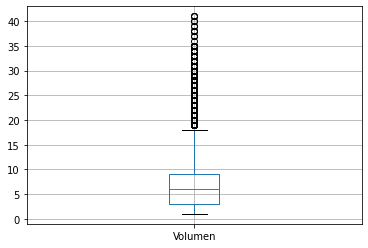

In [ ]:
order_details_per_month.boxplot()

In [ ]:
print(f"The total number of orders is: {order_details_per_month.shape[0]}")

The total number of orders is: 204636


In [ ]:
mask1 = (ds.train_df["Marca2"] == "Marca_20") & (ds.train_df["Cupo2"] == "Cupo_3") & (ds.train_df["CapacidadEnvase2"] == "CapacidadEnvase_9")
mask2 = (ds.train_df["Marca2"] == "Marca_16") & (ds.train_df["Cupo2"] == "Cupo_2") & (ds.train_df["CapacidadEnvase2"] == "CapacidadEnvase_10")
mask3 = (ds.train_df["Marca2"] == "Marca_9") & (ds.train_df["Cupo2"] == "Cupo_3") & (ds.train_df["CapacidadEnvase2"] == "CapacidadEnvase_12")
mask4 = (ds.train_df["Marca2"] == "Marca_38") & (ds.train_df["Cupo2"] == "Cupo_2") & (ds.train_df["CapacidadEnvase2"] == "CapacidadEnvase_10")
mask5 = (ds.train_df["Marca2"] == "Marca_39") & (ds.train_df["Cupo2"] == "Cupo_2") & (ds.train_df["CapacidadEnvase2"] == "CapacidadEnvase_10")
masks = [mask1, mask2, mask3, mask4, mask5]

In [ ]:
###############

In [ ]:
##############

In [ ]:
test_features = ds.get_features(train=True)

In [ ]:
ds.train_df.loc[mask5]

,Año,Mes,Cliente,SegmentoPrecio2,Marca2,Cupo2,CapacidadEnvase2,Volumen,disc,nr,date
1387939,2020,7,10,SegmentoPrecio_3,Marca_39,Cupo_2,CapacidadEnvase_10,0.019561,0.0,273.317665,2020-07-01
1387941,2020,8,212,SegmentoPrecio_3,Marca_39,Cupo_2,CapacidadEnvase_10,0.000000,0.0,0.000000,2020-08-01
1387943,2020,9,274,SegmentoPrecio_3,Marca_39,Cupo_2,CapacidadEnvase_10,0.117366,0.0,1566.288973,2020-09-01
1387945,2020,9,374,SegmentoPrecio_3,Marca_39,Cupo_2,CapacidadEnvase_10,0.039122,0.0,541.944384,2020-09-01
1387947,2020,8,435,SegmentoPrecio_3,Marca_39,Cupo_2,CapacidadEnvase_10,0.078244,0.0,1107.984415,2020-08-01
...,...,...,...,...,...,...,...,...,...,...,...
1406107,2020,8,20567,SegmentoPrecio_3,Marca_39,Cupo_2,CapacidadEnvase_10,0.019561,0.0,266.775062,2020-08-01
1406109,2020,7,20569,SegmentoPrecio_3,Marca_39,Cupo_2,CapacidadEnvase_10,0.039122,0.0,530.685697,2020-07-01
1406111,2020,8,20577,SegmentoPrecio_3,Marca_39,Cupo_2,CapacidadEnvase_10,0.039122,0.0,544.150314,2020-08-01
1406113,2020,7,20580,SegmentoPrecio_3,Marca_39,Cupo_2,CapacidadEnvase_10,0.058683,0.0,759.218996,2020-07-01


In [ ]:
simil = ds.train_df.loc[mask4].groupby(["date","Cliente"])["Volumen"].count() == ds.train_df.loc[mask5].groupby(["date","Cliente"])["Volumen"].count()
all(simil)

True

**Mentor Question:** What is the meaning of volumen 0. Talk about the relation between Marca4 and Marca5: In every order where Marca4 appears Marca5 also does. But, sometimes it is zero!

In [ ]:
for i, mask in enumerate(masks):
  print(f"Marca {i+1} appears in {ds.train_df.loc[mask].shape[0]} orders")

Marca 1 appears in 5347 orders
Marca 2 appears in 9676 orders
Marca 3 appears in 56898 orders
Marca 4 appears in 9089 orders
Marca 5 appears in 9089 orders


In [ ]:
marca1 = ds.train_df.loc[mask1].copy()
marca1.drop (['Año', 'Mes', 'SegmentoPrecio2', 'Marca2', 'Cupo2', 'CapacidadEnvase2'], axis=1, inplace=True)
marca1.describe(include="all")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  This is separate from the ipykernel package so we can avoid doing imports until


,Cliente,Volumen,disc,nr,date
count,5347.0,5347.000000,5347.0,5347.000000,5347
unique,3626.0,NaN,NaN,NaN,3
top,11894.0,NaN,NaN,NaN,2020-08-01 00:00:00
freq,3.0,NaN,NaN,NaN,2384
first,NaN,NaN,NaN,NaN,2020-07-01 00:00:00
last,NaN,NaN,NaN,NaN,2020-09-01 00:00:00
mean,NaN,0.085862,0.0,539.260288,NaN
std,NaN,0.254216,0.0,1594.691706,NaN
min,NaN,0.004215,0.0,26.367546,NaN
25%,NaN,0.016861,0.0,105.470130,NaN


Note: marca1 does not have discounts <br>
**Note (Important)**: for marca1 only 3 unique months of history out of 17

**Mentor Question:** If an item for given time does not appear in the table does it means the Volumen bought was 0? If so why are there some lines with 0.0 Volumen?

In [ ]:
marca = ds.train_df.loc[mask3].copy()
marca.drop (['Año', 'Mes', 'SegmentoPrecio2', 'Marca2', 'Cupo2', 'CapacidadEnvase2'], axis=1, inplace=True)
marca.describe(include="all")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  This is separate from the ipykernel package so we can avoid doing imports until


,Cliente,Volumen,disc,nr,date
count,56898.0,56898.000000,56898.000000,56898.000000,56898
unique,9873.0,NaN,NaN,NaN,17
top,7516.0,NaN,NaN,NaN,2019-12-01 00:00:00
freq,17.0,NaN,NaN,NaN,4655
first,NaN,NaN,NaN,NaN,2019-05-01 00:00:00
last,NaN,NaN,NaN,NaN,2020-09-01 00:00:00
mean,NaN,0.086924,-122.867234,1375.506672,NaN
std,NaN,0.575901,1731.348012,8233.143236,NaN
min,NaN,0.003117,-241846.113516,28.522471,NaN
25%,NaN,0.018705,-41.058746,293.241332,NaN


In [ ]:
marca

,Cliente,Volumen,disc,nr,date
41,10,0.037410,-27.511153,595.371853,2019-09-01
50,10,0.018705,0.000000,312.594302,2019-10-01
75,10,0.018705,0.000000,312.594302,2020-01-01
78,10,0.187048,-362.140404,2775.419943,2020-02-01
94,10,0.018705,-41.058746,289.278489,2019-12-01
...,...,...,...,...,...
1387758,6676,0.004676,0.000000,82.757951,2020-05-01
1387799,8393,0.130933,0.000000,2285.845517,2019-08-01
1387830,8393,0.093524,-170.254307,1381.722063,2019-06-01
1387855,8393,0.093524,0.000000,1562.971455,2019-11-01


In [ ]:
clients = marca["Cliente"].unique()

In [ ]:
type(clients)

pandas.core.arrays.categorical.Categorical

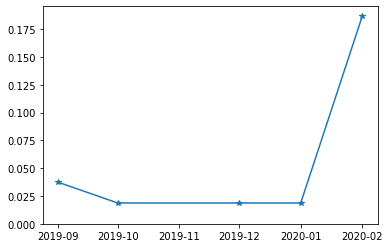

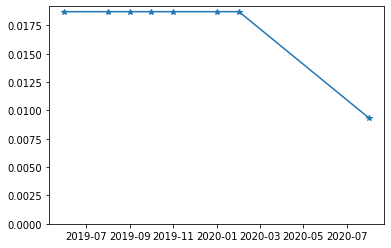

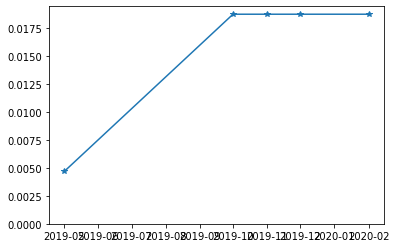

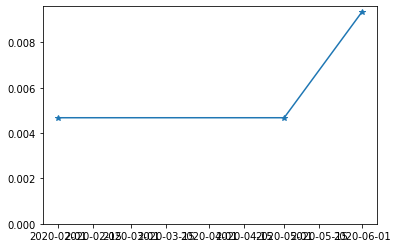

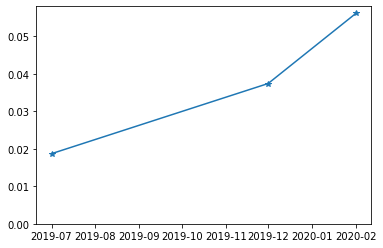

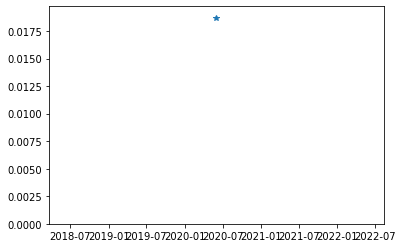

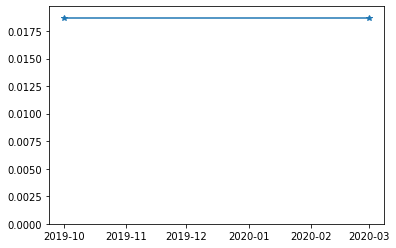

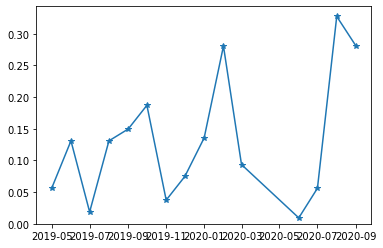

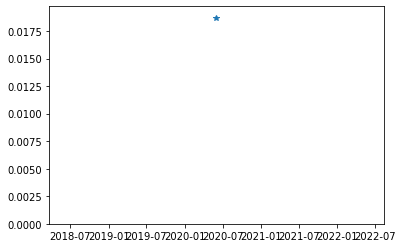

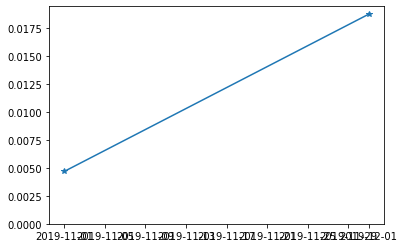

In [ ]:
for client in clients[:10]:
  d = marca.loc[marca["Cliente"]==client].set_index("date")
  f, ax = plt.subplots()
  ax.plot(d["Volumen"].sort_index(), '*-')
  ax.set_ylim(0)

In [ ]:
ds.train_df

,Año,Mes,Cliente,SegmentoPrecio2,Marca2,Cupo2,CapacidadEnvase2,Volumen,disc,nr,date
0,2019,5,10,SegmentoPrecio_1,Marca_1,Cupo_1,CapacidadEnvase_12,0.112229,-30.590603,900.328567,2019-05-01
1,2019,5,10,SegmentoPrecio_1,Marca_2,Cupo_2,CapacidadEnvase_10,0.021734,0.000000,149.184463,2019-05-01
2,2019,5,10,SegmentoPrecio_2,Marca_3,Cupo_2,CapacidadEnvase_10,0.043469,0.000000,359.625828,2019-05-01
3,2019,5,10,SegmentoPrecio_1,Marca_1,Cupo_2,CapacidadEnvase_16,0.026345,-31.065261,134.748399,2019-05-01
4,2019,5,10,SegmentoPrecio_1,Marca_4,Cupo_2,CapacidadEnvase_10,0.086938,0.000000,496.901005,2019-05-01
...,...,...,...,...,...,...,...,...,...,...,...
1406111,2020,8,20577,SegmentoPrecio_3,Marca_39,Cupo_2,CapacidadEnvase_10,0.039122,0.000000,544.150314,2020-08-01
1406112,2020,7,20580,SegmentoPrecio_1,Marca_38,Cupo_2,CapacidadEnvase_10,0.000000,0.000000,0.000000,2020-07-01
1406113,2020,7,20580,SegmentoPrecio_3,Marca_39,Cupo_2,CapacidadEnvase_10,0.058683,0.000000,759.218996,2020-07-01
1406114,2020,9,20580,SegmentoPrecio_1,Marca_38,Cupo_2,CapacidadEnvase_10,0.000000,0.000000,0.000000,2020-09-01


In [ ]:
ds.test_df

,Cliente,Marca1,Marca2,Marca3,Marca_Inno1,Marca_Inno2
0,10,NaN,NaN,NaN,NaN,NaN
1,12,NaN,NaN,NaN,NaN,NaN
2,14,NaN,NaN,NaN,NaN,NaN
3,15,NaN,NaN,NaN,NaN,NaN
4,18,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
9297,20186,NaN,NaN,NaN,NaN,NaN
9298,20261,NaN,NaN,NaN,NaN,NaN
9299,20309,NaN,NaN,NaN,NaN,NaN
9300,20360,NaN,NaN,NaN,NaN,NaN


In [ ]:
ds.clients_df.columns

Index(['Cliente', 'Regional2', 'Gerencia2', 'SubCanal2', 'Categoria',
       'Nevera'],
      dtype='object')

In [ ]:
ds.clients_df

,Cliente,Regional2,Gerencia2,SubCanal2,Categoria,Nevera
0,1,Regional 1,Gerencia_1,Subcanal_1,Categoria_1,0
1,2,Regional 1,Gerencia_1,Subcanal_1,Categoria_1,0
2,3,Regional 1,Gerencia_1,Subcanal_1,Categoria_1,0
3,4,Regional 1,Gerencia_1,Subcanal_1,Categoria_1,1
4,5,Regional 1,Gerencia_1,Subcanal_1,Categoria_2,1
...,...,...,...,...,...,...
20916,20917,Regional 1,Gerencia_1,Subcanal_31,Categoria_2,0
20917,20918,Regional 1,Gerencia_4,Subcanal_31,Categoria_1,0
20918,20919,Regional 1,Gerencia_9,Subcanal_31,Categoria_1,0
20919,20920,Regional 1,Gerencia_10,Subcanal_31,Categoria_1,0


# functionalcluster

In [ ]:
test_df = ds.test_df
test_df

,Cliente,Marca1,Marca2,Marca3,Marca_Inno1,Marca_Inno2
0,10,NaN,NaN,NaN,NaN,NaN
1,12,NaN,NaN,NaN,NaN,NaN
2,14,NaN,NaN,NaN,NaN,NaN
3,15,NaN,NaN,NaN,NaN,NaN
4,18,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
9297,20186,NaN,NaN,NaN,NaN,NaN
9298,20261,NaN,NaN,NaN,NaN,NaN
9299,20309,NaN,NaN,NaN,NaN,NaN
9300,20360,NaN,NaN,NaN,NaN,NaN


In [ ]:
features_test = ds.get_features(train=False)
features_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12393 entries, 0 to 12392
Data columns (total 43 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Cliente              12393 non-null  int64  
 1   Gerencia2            12393 non-null  object 
 2   SubCanal2            12393 non-null  object 
 3   Categoria            12393 non-null  object 
 4   Nevera               12393 non-null  int64  
 5   marca_3_2019_7_vol   12393 non-null  float64
 6   marca_2_2019_8_vol   12393 non-null  float64
 7   marca_3_2019_8_vol   12393 non-null  float64
 8   marca_2_2019_9_vol   12393 non-null  float64
 9   marca_3_2019_9_vol   12393 non-null  float64
 10  marca_2_2019_10_vol  12393 non-null  float64
 11  marca_3_2019_10_vol  12393 non-null  float64
 12  marca_2_2019_11_vol  12393 non-null  float64
 13  marca_3_2019_11_vol  12393 non-null  float64
 14  marca_2_2019_12_vol  12393 non-null  float64
 15  marca_3_2019_12_vol  12393 non-null 

In [ ]:
def pred_proba_base_line( marca, features, lags = 17):
  marcas_dicc = {'marca_1':'Marca1', 'marca_2':'Marca2', 'marca_3':'Marca3',
                 'marca_4':'Marca_Inno1','marca_5':'Marca_Inno2'}
  list_preds = []
  for marca in marcas_dicc.keys():
    columns = [col for col in features.columns if marca in col]
    columns = ['Cliente'] + columns
    features_marca = features[columns]
    features_marca.set_index('Cliente', inplace=True)
    bought_bool_all = features_marca >0
    bought_bool = bought_bool_all[bought_bool_all.columns[-lags:]]
    pred_marca = pd.DataFrame(data=bought_bool.mean(axis=1),columns=[marcas_dicc[marca]])
    list_preds.append(pred_marca)
  predicts = pd.concat(list_preds,axis=1)
  predicts.fillna(0,inplace=True)
  predicts.reset_index(inplace=True)
  return predicts


### Send 1 Probability estimated with all before periods 0.71195341656747

In [ ]:
predicts = pred_proba_base_line('marca_2', features_test, lags=20)
clientes = pd.DataFrame(test_df['Cliente'])
test_predicts = clientes.merge(predicts, how='left', left_on='Cliente', right_on='Cliente')
test_predicts.fillna(0, inplace=True)   # salen faltantes
test_predicts.to_csv(ds.DATAPATH/'prediction_send_1.csv', index=False)

,Cliente,Marca1,Marca2,Marca3,Marca_Inno1,Marca_Inno2
0,1,0.000000,0.0,0.000000,0.666667,0.000000
1,2,0.666667,0.0,0.000000,0.333333,0.000000
2,3,0.000000,0.0,0.000000,0.333333,0.000000
3,4,0.666667,0.0,0.000000,0.666667,0.000000
4,5,0.666667,0.0,0.333333,0.000000,0.000000
...,...,...,...,...,...,...
12388,20529,0.000000,0.0,0.000000,0.666667,0.000000
12389,20567,0.000000,0.0,0.000000,0.333333,0.333333
12390,20569,0.000000,0.0,0.000000,0.000000,0.333333
12391,20577,0.000000,0.0,0.000000,0.333333,0.333333


### Send 2 Probability estimated with all  the last three periods 0.64646071663265

In [ ]:
predicts = pred_proba_base_line('marca_2', features_test, lags=3)
clientes = pd.DataFrame(test_df['Cliente'])
test_predicts = clientes.merge(predicts, how='left', left_on='Cliente', right_on='Cliente')
test_predicts.fillna(0, inplace=True)   # salen faltantes
test_predicts.to_csv(ds.DATAPATH/'prediction_send_2.csv', index=False)

### other

In [ ]:
test_df

,Cliente,Marca1,Marca2,Marca3,Marca_Inno1,Marca_Inno2
0,10,NaN,NaN,NaN,NaN,NaN
1,12,NaN,NaN,NaN,NaN,NaN
2,14,NaN,NaN,NaN,NaN,NaN
3,15,NaN,NaN,NaN,NaN,NaN
4,18,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
9297,20186,NaN,NaN,NaN,NaN,NaN
9298,20261,NaN,NaN,NaN,NaN,NaN
9299,20309,NaN,NaN,NaN,NaN,NaN
9300,20360,NaN,NaN,NaN,NaN,NaN


In [ ]:
df1 = pd.DataFrame([['a', 1], ['b', 2]],
                   columns=['letter', 'number'])
df2 = pd.DataFrame([['a', 3], ['b', 4]],
                   columns=['letter', 'number'])
df1.set_index('letter',inplace=True)
df2.set_index('letter',inplace=True)
pd.concat([df1, df2], axis=1)

,number,number
letter,,
a,1,3
b,2,4


In [ ]:
test_df

,Cliente,Marca1,Marca2,Marca3,Marca_Inno1,Marca_Inno2
0,10,NaN,NaN,NaN,NaN,NaN
1,12,NaN,NaN,NaN,NaN,NaN
2,14,NaN,NaN,NaN,NaN,NaN
3,15,NaN,NaN,NaN,NaN,NaN
4,18,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
9297,20186,NaN,NaN,NaN,NaN,NaN
9298,20261,NaN,NaN,NaN,NaN,NaN
9299,20309,NaN,NaN,NaN,NaN,NaN
9300,20360,NaN,NaN,NaN,NaN,NaN
